# CHEATSHEET BLOQUE I
Importacion de librerias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt

Lectura de ficheros:

In [2]:
def read_file1(file_name):
    file = pd.read_csv(file_name, names=["X","y"])
    X = pd.DataFrame({'X': file['X']})
    y = pd.DataFrame({'y': file['y']})

    return X, y

def read_file2(file_name):
    file = pd.read_csv(file_name, names=["X1","X2","y"])
    X = pd.DataFrame({'X1': file['X1'], 'X2': file['X2']})
    y = pd.DataFrame({'y': file['y']})
    
    return X, y

def read_file3(file_name):
    file = pd.read_csv(file_name, names=["score1", "score2", "label"])
    X = pd.DataFrame({'score1': file['score1'],'score2': file['score2']})
    y = pd.DataFrame({'label': file['label']})
    
    return X, y

## Regresion lineal
### Regresion lineal univariable

* La realidad se modela con base a la recta que mejor ajusta el conjunto de entrenamiento (Buscamos la distancia media mínima de todos los puntos a la recta).
* Se realizan múltiples iteraciones para ir ajustando los coeficientes para formar la recta (paramos cuando cumplamos una tolerancia de error y/o X iteraciones).

#### Función de coste (Error cuadrático)

\begin{equation}
J(\theta)=\frac{1}{2 \cdot m}\sum_{i=1}^{m} (h_{\theta}-y)^2 = \frac{1}{2 \cdot m}\sum (X \cdot \theta-y)^2
\end{equation}


In [3]:
# Coste computacional de la regresión lineal univariante
def computeCost(X, y, tetha):
    m = len(y)
    h = np.dot(X, tetha)
    return np.dot((h-y).T,h-y)/2*m

#### Inicializacion de $\theta$ y $x_0$ con primera columna de unos

In [4]:
X, y = read_file1('datasets/ex1data1.txt')
ones = np.ones((len(y),1))
X['ones'] = ones
X = X[['ones','X']]

theta = np.zeros((X.shape[1],1))

print("Estadisticas del dataset 1 (ex1data1.txt): \n"+ str(X.describe())) 

Estadisticas del dataset 1 (ex1data1.txt): 
       ones          X
count  97.0  97.000000
mean    1.0   8.159800
std     0.0   3.869884
min     1.0   5.026900
25%     1.0   5.707700
50%     1.0   6.589400
75%     1.0   8.578100
max     1.0  22.203000


#### Descenso del gradiente:

\begin{equation}
\theta = \theta - \alpha \frac{1}{m} (X^T \cdot (X \cdot \theta - y))
\end{equation}

In [5]:
# Descenso del gradiente de la regresión lineal
def gradientDescent(X, y, theta, iter, alpha):
    m = len(y)
    current_cost = []
    current_iter = []
    J_history = []
    for i in range(iter):
        theta = theta - alpha * (np.dot(X.T, (np.dot(X, theta) - y)))/m
        current_cost.append(computeCost(X, y, theta))
        current_iter.append(i)
    
    J_history = pd.DataFrame({'iter': current_iter, 'cost': current_cost})
    return theta, J_history

#### Ejemplo con datos de pruebas:

In [6]:
theta, J_history = gradientDescent(X, y, theta, 1500, 0.01)
print("Thetas resultantes: \n" + str(theta))

# Metemos un vector de 1s para poder hacer la multiplicación de matrices
predict1 = np.dot([1, 3.5], theta)
predict2 = np.dot([1, 7], theta)
predict3 = np.dot([1, 10], theta)

print("Estas son las predicciones para 3.5, 7 y 10: \n" + str(predict1) + "\n" + str(predict2) + "\n" + str(predict3))

Thetas resultantes: 
[[-3.63029144]
 [ 1.16636235]]
Estas son las predicciones para 3.5, 7 y 10: 
[0.45197679]
[4.53424501]
[8.03333206]


#### Grafica para mostrar el Cost vs Iter:

In [7]:
def costvsiter(J_history):
    plt.plot(J_history['iter'], J_history['cost'])
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.title("Cost vs Number of iterations")
    plt.show()

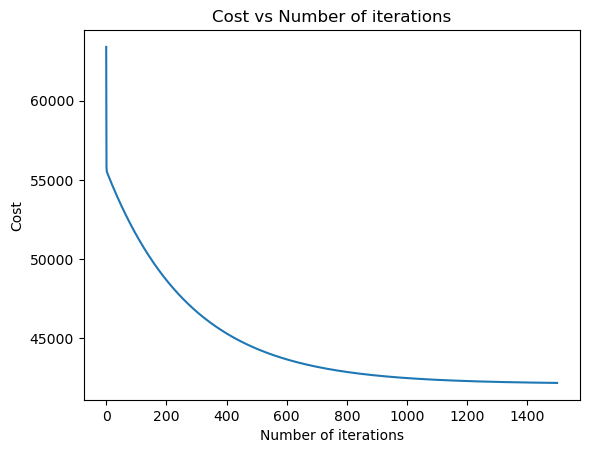

In [8]:
costvsiter(J_history)

#### Regresión lineal de las $\theta$ óptimas en los datos: 

In [9]:
def plotDataTheta(theta, X, y):
    plt.scatter(X['X'], y, color='red', marker='x')
    plt.plot(X['X'], np.dot(X, theta))
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.title("Profit vs Population of City")
    plt.show()

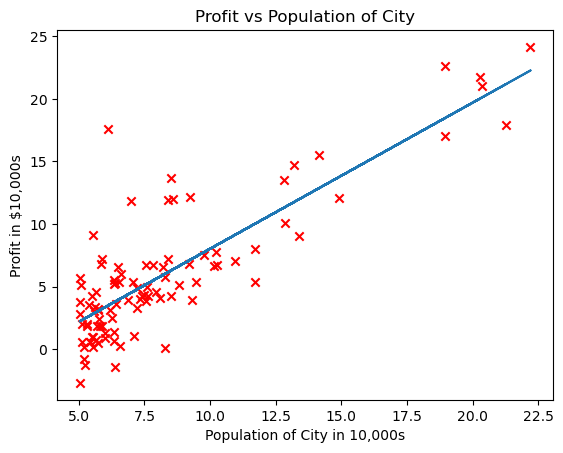

In [10]:
plotDataTheta(theta, X, y)

#### Regresión lineal multivariable

* La realidad se modela con base al plano que mejor ajusta el conjunto de entrenamiento (Buscamos la distancia media mínima de todos los puntos al plano).
* Se realizan múltiples iteraciones para ir ajustando los coeficientes para formar el plano (paramos cuando cumplamos una tolerancia de error y/o X iteraciones).

#### Función de coste (Error cuadrático)(Mismo que la de una variable):

\begin{equation}
J(\theta)=\frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x_i) - y_i \right)^2 = \frac{1}{2m} \left( X \cdot \theta - y \right)^T \left( X \cdot \theta - y \right)
\end{equation}

#### Inicializacion de $\theta$ y $x_0$ con primera columna de unos

In [11]:
X, y = read_file2('datasets/ex1data2.txt')
ones = np.ones((len(y),1))
X['ones'] = ones
X = X[['ones','X1','X2']]

theta = np.zeros((X.shape[1],1))

print("Estadísticas de la segunda base de datos: \n" + str(X.describe()))

Estadísticas de la segunda base de datos: 
       ones           X1         X2
count  47.0    47.000000  47.000000
mean    1.0  2000.680851   3.170213
std     0.0   794.702354   0.760982
min     1.0   852.000000   1.000000
25%     1.0  1432.000000   3.000000
50%     1.0  1888.000000   3.000000
75%     1.0  2269.000000   4.000000
max     1.0  4478.000000   5.000000


#### Descenso del gradiente(la misma que la de una variable):

\begin{equation}
\theta = \theta - \alpha \frac{1}{m} (X^T \cdot (X \cdot \theta - y))
\end{equation}

#### Ejemplo con datos de pruebas:

In [12]:
theta, J_history = gradientDescent(X, y, theta, 1500, 0.01)
print(theta)


C:\Users\danit\AppData\Local\Temp\ipykernel_18104\328925320.py:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (np.dot(X.T, (np.dot(X, theta) - y)))/m


[[nan]
 [nan]
 [nan]]


## Regresión Logística
### Regresión logística binaria

#### Función sigmoide para la hipótesis:

In [13]:
# z es theta.T * X 
def sigmoid(z):
    return (1/(1+np.exp(-z)))

#### Coste regresión logística:

\begin{equation}
J(\theta)=\frac{-1}{m}\sum_{i=1}^{m} (y^i \cdot log(h_{\theta}(x^i))+(1-y^i)\cdot log(1-h_{\theta}(x^i)))
\end{equation}

\begin{equation}
= 
\frac{-1}{m}\sum (y \cdot log(h_{\theta}(X))+(1-y)\cdot log(1-h_{\theta}(X)))
\end{equation}

In [14]:
def computeCost(X, y, theta):
    return (-1/len(y))*(np.dot(y,np.log(sigmoid(X, theta)))+np.dot(1-y,np.log(1-sigmoid(X, theta))))

##### Carga de datos:

In [15]:
X, y = read_file3("datasets/ex2data1.txt")

#### Descenso del gradiente

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^i)-y^i)\cdot x_j^i
\end{equation}

In [16]:
def gradientDescent(X, y, theta, iter, alpha):
    m = len(y)
    cost = []
    iterations = []
    for i in range(iter):
        h = sigmoid(np.dot(X.T, theta))
        theta = theta - alpha * (1/m) * np.dot(X.T, h - y)
        cost.append(computeCost(X, y, theta))
        iterations.append(i)
    
    J_history = pd.DataFrame({'iter': iterations, 'cost': cost})
        
    return theta, J_history


#### Ejercicio de ejemplo

In [17]:
ones = np.ones((len(X), 1))
X.insert(0, 'unos', ones)

theta = np.zeros((len(y), 1))
display(X.head())

theta, J_history = gradientDescent(X, y, theta, 1500, 0.01)

print(theta)

,unos,score1,score2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\danit\AppData\Local\Temp\ipykernel_18104\3096782027.py", line 7, in <module>
    theta, J_history = gradientDescent(X, y, theta, 1500, 0.01)
  File "C:\Users\danit\AppData\Local\Temp\ipykernel_18104\3187127537.py", line 7, in gradientDescent
    theta = theta - alpha * (1/m) * np.dot(X.T, h - y)
  File "c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\pandas\core\generic.py", line 2171, in __array_ufunc__
    return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
  File "c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\pandas\core\arraylike.py", line 276, in array_ufunc
    result = maybe_dispatch_ufunc_to_dunder_op(self, ufunc, method, *inputs, **kwargs)
  File "ops_dispatch.pyx", line 113, in pandas._libs.ops_dispa

### Redes neuronales
#### Funciones de activación (Sigmoide)
$\sigma(z) = \frac{1}{1 + e^{-z}}$


In [18]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#### Forward-propagation
Forma en la que se modela el transpaso de conocimiento a través de las neuronas y capas para obtener la salida final


In [19]:
def forward(thetas, X):
    activations = []  # Para guardar las activaciones de cada capa
    a = np.hstack((1, X))  # A1 (añadimos el bias a la capa de entrada)
    activations.append(a)
    
    # Iteramos sobre cada capa
    for i in range(len(thetas)):
        z = np.dot(thetas[i], a)  # Producto punto entre los pesos y las activaciones anteriores
        a = sigmoid(z)  # Aplicamos la función sigmoide
        if i < len(thetas) - 1:  # Si no es la última capa
            a = np.hstack((1, a))  # Añadimos el bias (1) a las activaciones para las capas ocultas
        activations.append(a)  # Guardamos las activaciones
    
    # La última activación es la salida h
    h = activations[-1]
    
    return activations, h

#### Coste de la red neuronal

\begin{equation}
J(\Theta)=\frac{-1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} (y_k^i \cdot log((h_{\theta}(x^i))_k)+(1-y_k^i)\cdot log(1-(h_{\theta}(x^i))_k))
\end{equation}

In [20]:
def nnCostFunction(nn_params, layer_sizes, X, y):
  # Paso 1: Desenrollar los parámetros con el mismo order con el que se enrollaron
  thetas = []
  start = 0
  for i in range(len(layer_sizes) - 1):
    end = start + (layer_sizes[i + 1] * (layer_sizes[i] + 1))
    theta = np.reshape(nn_params[start:end], (layer_sizes[i + 1], layer_sizes[i] + 1), order='F')
    thetas.append(theta)
    start = end

  # Paso 2: Definir variables necesarias
  m = len(y)
  suma = 0
  y_d = pd.DataFrame(y)  # ¡¡IMPORTANTE!!: No aplicamos one-hot encoding ya que solo tenemos 1 clase: spam/no spam.
  # Pero es importante transformar y a DataFrame para poder acceder fila por fila

  # Paso 3: Para cada fila
  for i in range(X.shape[0]):
    # Paso 3.1: Forward propagation
    activations, h = forward(thetas, X[i])
    # Paso 3.2: Coste (como en regresión logística)
    temp1 = y_d.iloc[i] * (np.log(h))
    temp2 = (1 - y_d.iloc[i]) * np.log(1 - h)
    temp3 = np.sum(temp1 + temp2)
    suma = suma + temp3

  J = (np.sum(suma) / (-m))
  return J

#### Gradiente:

In [21]:
def nnGradFunction(nn_params, layer_sizes, X, y):
  # Paso 1: Enrollar nn_params para obtener cada uno de los theta (pesos/parámetros)
  thetas = []
  start = 0
  for i in range(len(layer_sizes) - 1):
    end = start + (layer_sizes[i] + 1) * layer_sizes[i + 1]
    theta = np.reshape(nn_params[start:end], (layer_sizes[i + 1], layer_sizes[i] + 1), order='F')
    thetas.append(theta)
    start = end

  # Paso 2: Definir variables necesarias
  m = len(y)
  y_d = pd.DataFrame(y)  # ¡¡IMPORTANTE!!: No aplicamos one-hot encoding ya que solo tenemos 1 clase: spam/no spam.
  deltas = [np.zeros(theta.shape) for theta in thetas]

  # Paso 3: Para cada fila
  for i in range(X.shape[0]):
    # Paso 3.1: Forward propagation
    a = [np.hstack((1, X[i]))]  # Añadir bias a la entrada
    for theta in thetas:
      a.append(np.hstack((1, sigmoid(a[-1] @ theta.T))))
    a[-1] = a[-1][1:]  # Eliminar bias de la última capa

    # Paso 3.2: Cálculo de los delta/errores
    d = [a[-1] - y_d.iloc[i]]  # Error en la última capa
    for j in range(len(thetas) - 1, 0, -1):
      d.insert(0, np.multiply(thetas[j].T @ d[0], np.multiply(a[j], 1 - a[j]))[1:])

    # Paso 3.3: Cálculo de las derivadas ajustando las dimensiones de los errores y las activaciones de cada capa correctamente
    for j in range(len(deltas)):
      deltas[j] += np.reshape(d[j], (layer_sizes[j + 1], 1)) @ np.reshape(a[j], (1, layer_sizes[j] + 1))

  # Paso 4: Se desenrollan ambas derivadas con el mismo order con el que se enrollaron
  deltas = [delta / m for delta in deltas]
  gradiente = np.hstack([delta.ravel(order='F') for delta in deltas])
  return gradiente

#### Training de la red neuronal

In [22]:
def training(initial_thetas, X_train, y_train, layer_sizes):
  maxiter = 10  # Si tarda demasiado, se puede bajar el número de iteraciones al hacer la prueba inicial para comprobar que el entrenamiento es el adecuado

  # Paso 1: Desenrollar los parámetros con el mismo order con el que se enrollaron
  nn_initial_params = np.hstack([theta.ravel(order='F') for theta in initial_thetas])

  # Paso 2: Llamada al optimizador avanzado gradiente conjugado con la función: fmin_cg
  nn_params = opt.fmin_cg(maxiter=maxiter, f=nnCostFunction, x0=nn_initial_params, fprime=nnGradFunction,
              args=(layer_sizes, X_train, y_train.flatten()), gtol=0.005)

  # Paso 3: Enrollar los pesos/parámetros theta desde la salida del optimizador avanzado (nn_params)
  thetas = []
  start = 0
  for i in range(len(layer_sizes) - 1):
    end = start + (layer_sizes[i + 1] * (layer_sizes[i] + 1))
    theta = np.reshape(nn_params[start:end], (layer_sizes[i + 1], layer_sizes[i] + 1), order='F')
    thetas.append(theta)
    start = end

  return thetas

#### Predicción de la red neuronal

In [23]:
def predict(thetas, X):
  # Variables útiles
  m = len(X)
  ones = np.ones((m, 1))

  a = np.hstack((ones, X))
  for theta in thetas[:-1]:
    a = np.hstack((ones, sigmoid(a @ theta.T)))
  h = sigmoid(a @ thetas[-1].T)  # La hipótesis o predicción

  # Si h es mayor o igual que 0.5, entonces la predicción será 1, si es menor que 0.5 será 0
  # Función np.where: https://numpy.org/doc/stable/reference/generated/numpy.where.html : np.where(condicion, value if TRUE, value if FALSE)
  pred = np.where(h >= 0.5, 1, 0)
  return pred

#### Definir theta inicial

In [24]:
def thetasInicial(nlayers, epsilon=0.12):
  thetas = []
  for i in range(1, len(nlayers)):
    theta = np.random.rand(nlayers[i], nlayers[i - 1] + 1) * 2 * epsilon - epsilon
    thetas.append(theta)
  return thetas

#### Ejemplo de red neuronal

In [25]:
data = sio.loadmat('datasets/ex4data1.mat')
X = data['X']
y = data['y']

nlayer = [5, 4, 3]
thetas = thetasInicial(nlayer)

trained_thetas = training(thetas, X, y, nlayer)
predictions = predict(trained_thetas, X)
print("Predicciones: \n", predictions)


ValueError: shapes (4,6) and (401,) not aligned: 6 (dim 1) != 401 (dim 0)